# FOUNDATION LEARNING SKILLS

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Raw data

In [3]:
xl_file = pd.ExcelFile('Foundational-learning_2021-1.xlsx')

In [4]:
df = xl_file.parse('Foundational learning', header=[0, 1])

for i in range(0,7):
    df.rename({df.columns[i][1]:""}, axis="columns", inplace=True)
    
df.drop(df.index[100:], inplace=True)

In [5]:
df

Countries and areas Region Sub-region Development regions  \
                                                                     
0                 Bangladesh     SA         SA     Least Developed   
1                 Bangladesh     SA         SA     Least Developed   
2                 Bangladesh     SA         SA     Least Developed   
3                 Bangladesh     SA         SA     Least Developed   
4   Central African Republic    SSA        WCA     Least Developed   
..                       ...    ...        ...                 ...   
95              Turkmenistan    ECA       EECA      Less Developed   
96                  Zimbabwe    SSA        ESA      Less Developed   
97                  Zimbabwe    SSA        ESA      Less Developed   
98                  Zimbabwe    SSA        ESA      Less Developed   
99                  Zimbabwe    SSA        ESA      Less Developed   

      Age group   Subject      Total        Sex             Residence  \
                                          Girls       Boys      Rural   
0   Age 7 to 14   Reading  48.814716  52.392544  45.074005  46.981983   
1   Age 7 to 14  Numeracy  27.866051  28.959688  26.722622  26.574785   
2     Grade 2/3   Reading  24.599609  26.002825  23.178070  21.751852   
3     Grade 2/3  Numeracy  12.550222  12.392838  12.709662  11.408230   
4   Age 7 to 14   Reading   4.693856   4.560828   4.809788   2.057838   
..          ...       ...        ...        ...        ...        ...   
95    Grade 2/3  Numeracy  53.200000  64.800000  58.500000        NaN   
96  Age 7 to 14   Reading  44.365719  48.368660  40.518608  36.768028   
97  Age 7 to 14  Numeracy  24.620714  26.782095  22.543474  19.146442   
98    Grade 2/3   Reading  19.576178  21.219332  17.992134  12.351241   
99    Grade 2/3  Numeracy   5.108691   4.419424   5.773163   2.455187   

              Wealth quintile                                              \
        Urban         Poorest     Second     Middle     Fourth    Richest   
0   55.805260       35.360210  43.906765  50.639637  54.517452  63.611889   
1   32.791283       19.557022  25.148443  27.337364  31.040785  38.721001   
2   35.798244       16.602999  18.201494  22.767086  28.660402  42.274563   
3   17.041044        8.673656  10.437841  11.085612  12.559054  22.395241   
4    9.213395        0.486284   3.040068   1.691019   4.024787  13.331376   
..        ...             ...        ...        ...        ...        ...   
95        NaN             NaN        NaN        NaN        NaN        NaN   
96  67.629013       25.323767  34.230465  44.128292  56.616516  76.777069   
97  41.382336       12.622963  21.344015  20.532696  31.470972  47.066925   
98  41.673153        6.278276  10.377341  16.939035  27.667347  50.681393   
99  13.224252        0.395979   2.538109   2.018403   8.800878  17.066843   

     Data             
   Source       Year  
0   MICS6       2019  
1   MICS6       2019  
2   MICS6       2019  
3   MICS6       2019  
4   MICS6  2018-2019  
..    ...        ...  
95  MICS6       2019  
96  MICS6       2019  
97  MICS6       2019  
98  MICS6       2019  
99  MICS6       2019  

[100 rows x 18 columns]

In [6]:
df.dtypes

Countries and areas              object
Region                           object
Sub-region                       object
Development regions              object
Age group                        object
Subject                          object
Total                           float64
Sex                  Girls      float64
                     Boys       float64
Residence            Rural      float64
                     Urban      float64
Wealth quintile      Poorest    float64
                     Second     float64
                     Middle     float64
                     Fourth     float64
                     Richest    float64
Data                 Source      object
                     Year        object
dtype: object

## Data Cleaning

### Step 1: Handling missing data

**Are there any missing values?**

In [7]:
df.isnull().sum() * 100 / len(df)

Countries and areas             0.0
Region                          0.0
Sub-region                      0.0
Development regions             0.0
Age group                       0.0
Subject                         0.0
Total                           0.0
Sex                  Girls      0.0
                     Boys       0.0
Residence            Rural      6.0
                     Urban      6.0
Wealth quintile      Poorest    6.0
                     Second     6.0
                     Middle     6.0
                     Fourth     6.0
                     Richest    6.0
Data                 Source     0.0
                     Year       0.0
dtype: float64

In [8]:
df.isnull().sum()

Countries and areas             0
Region                          0
Sub-region                      0
Development regions             0
Age group                       0
Subject                         0
Total                           0
Sex                  Girls      0
                     Boys       0
Residence            Rural      6
                     Urban      6
Wealth quintile      Poorest    6
                     Second     6
                     Middle     6
                     Fourth     6
                     Richest    6
Data                 Source     0
                     Year       0
dtype: int64

In [9]:
df.shape

(100, 18)

In [10]:
null_rows = df.isnull()  # this does not work. Append .any(axis=1) to make it work
null_rows  # boolean indexing

Countries and areas Region Sub-region Development regions Age group  \
                                                                         
0                False  False      False               False     False   
1                False  False      False               False     False   
2                False  False      False               False     False   
3                False  False      False               False     False   
4                False  False      False               False     False   
..                 ...    ...        ...                 ...       ...   
95               False  False      False               False     False   
96               False  False      False               False     False   
97               False  False      False               False     False   
98               False  False      False               False     False   
99               False  False      False               False     False   

   Subject  Total    Sex        Residence        Wealth quintile         \
                   Girls   Boys     Rural  Urban         Poorest Second   
0    False  False  False  False     False  False           False  False   
1    False  False  False  False     False  False           False  False   
2    False  False  False  False     False  False           False  False   
3    False  False  False  False     False  False           False  False   
4    False  False  False  False     False  False           False  False   
..     ...    ...    ...    ...       ...    ...             ...    ...   
95   False  False  False  False      True   True            True   True   
96   False  False  False  False     False  False           False  False   
97   False  False  False  False     False  False           False  False   
98   False  False  False  False     False  False           False  False   
99   False  False  False  False     False  False           False  False   

                           Data         
   Middle Fourth Richest Source   Year  
0   False  False   False  False  False  
1   False  False   False  False  False  
2   False  False   False  False  False  
3   False  False   False  False  False  
4   False  False   False  False  False  
..    ...    ...     ...    ...    ...  
95   True   True    True  False  False  
96  False  False   False  False  False  
97  False  False   False  False  False  
98  False  False   False  False  False  
99  False  False   False  False  False  

[100 rows x 18 columns]

`isnull()` applied on the whole dataframe does not produce the intended behaviour. This function needs to be applied to check for *any* NaN values along the column side (*axis=1*).

**Any data that can be cleaned or transformed?**

In [11]:
df.head(7)

Countries and areas Region Sub-region Development regions  \
                                                                    
0                Bangladesh     SA         SA     Least Developed   
1                Bangladesh     SA         SA     Least Developed   
2                Bangladesh     SA         SA     Least Developed   
3                Bangladesh     SA         SA     Least Developed   
4  Central African Republic    SSA        WCA     Least Developed   
5  Central African Republic    SSA        WCA     Least Developed   
6  Central African Republic    SSA        WCA     Least Developed   

     Age group   Subject      Total        Sex             Residence  \
                                         Girls       Boys      Rural   
0  Age 7 to 14   Reading  48.814716  52.392544  45.074005  46.981983   
1  Age 7 to 14  Numeracy  27.866051  28.959688  26.722622  26.574785   
2    Grade 2/3   Reading  24.599609  26.002825  23.178070  21.751852   
3    Grade 2/3  Numeracy  12.550222  12.392838  12.709662  11.408230   
4  Age 7 to 14   Reading   4.693856   4.560828   4.809788   2.057838   
5  Age 7 to 14  Numeracy   1.527805   1.202405   1.811385   0.870304   
6    Grade 2/3   Reading   1.775748   1.798235   1.758916   1.379215   

             Wealth quintile                                              \
       Urban         Poorest     Second     Middle     Fourth    Richest   
0  55.805260       35.360210  43.906765  50.639637  54.517452  63.611889   
1  32.791283       19.557022  25.148443  27.337364  31.040785  38.721001   
2  35.798244       16.602999  18.201494  22.767086  28.660402  42.274563   
3  17.041044        8.673656  10.437841  11.085612  12.559054  22.395241   
4   9.213395        0.486284   3.040068   1.691019   4.024787  13.331376   
5   2.655113        0.150043   0.833223   1.646962   1.321195   3.428246   
6   2.422417        0.000000   2.188316   1.472594   1.221289   3.482309   

    Data             
  Source       Year  
0  MICS6       2019  
1  MICS6       2019  
2  MICS6       2019  
3  MICS6       2019  
4  MICS6  2018-2019  
5  MICS6  2018-2019  
6  MICS6  2018-2019

**Fill the missing data with 'NaN'**

In [12]:
col = []
for i in range(len(df.columns)):
    if i < 7:
        col.append(df.columns[i][0])
    else:
        col.append(df.columns[i][0] + '-' + df.columns[i][1])

In [13]:
df.columns = col
df

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Turkmenistan,ECA,EECA,Less Developed,Grade 2/3,Numeracy,53.200000,64.800000,58.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,MICS6,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,MICS6,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,MICS6,2019


### Step 2: Remove the irrelevant observations

**Drop the data columns with missing data 'NaN'**

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019


In [16]:
df.shape

(94, 18)

**Drop the unnecessary data column**

In [17]:
df = df.drop(('Data-Source'), axis=1)

In [18]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019


## Describing the Data

In [19]:
df.dtypes

Countries and areas         object
Region                      object
Sub-region                  object
Development regions         object
Age group                   object
Subject                     object
Total                      float64
Sex-Girls                  float64
Sex-Boys                   float64
Residence-Rural            float64
Residence-Urban            float64
Wealth quintile-Poorest    float64
Wealth quintile-Second     float64
Wealth quintile-Middle     float64
Wealth quintile-Fourth     float64
Wealth quintile-Richest    float64
Data-Year                   object
dtype: object

In [20]:
df.describe()

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,25.024077,25.861465,24.228419,22.350986,29.768563,17.371929,21.387640,24.266147,28.115457,37.684759
std,20.770505,21.860690,20.015429,21.112209,21.387091,19.048739,20.722063,22.238528,22.135513,23.564574
min,0.394631,0.051010,0.473044,0.022533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.234411,6.782024,7.440390,4.550694,12.301420,2.479506,3.636985,4.610935,8.740612,17.095623
50%,19.756634,19.898628,20.007759,13.027112,24.972675,8.001463,12.608856,16.606810,24.916075,37.256182
75%,39.055473,41.669121,37.287081,36.599011,44.219891,27.821079,33.977889,42.645542,44.460066,58.154563
max,81.800000,84.400000,82.000000,83.400000,79.000000,76.100000,89.800000,78.600000,79.900000,84.800000


**Is the data entered by a human?**

In [21]:
df['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [22]:
df['Development regions'].unique()

array(['Least Developed', 'Less Developed', 'More Developed'],
      dtype=object)

In [23]:
df['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

### Box Plot

In [24]:
df_total = df[['Total']]
df_total

,Total
0,48.814716
1,27.866051
2,24.599609
3,12.550222
4,4.693856
...,...
93,70.000000
96,44.365719
97,24.620714
98,19.576178


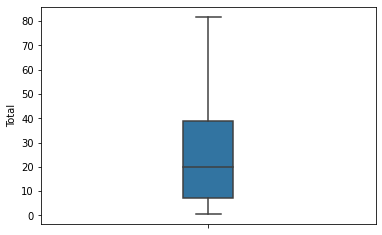

In [25]:
sns.boxplot(y='Total', width=0.15, data=df_total).figure.savefig('Total_Bosplot.png')

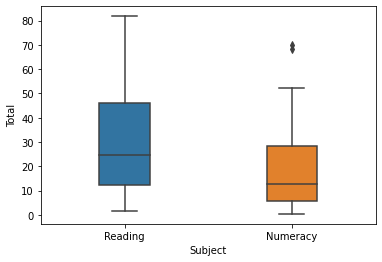

In [26]:
sns.boxplot(x='Subject', y='Total', width=0.3, data=df).figure.savefig('Total_vs_Subject.png')

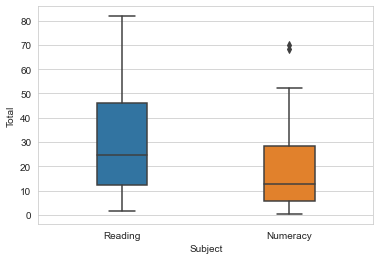

In [27]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=df).figure.savefig('Total_vs_Subject_withgrid.png')

## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [28]:
df[['Total', 'Sex-Girls', 'Sex-Boys', 'Residence-Rural', 'Residence-Urban', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889
1,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001
2,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563
3,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241
4,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376
...,...,...,...,...,...,...,...,...,...,...
93,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000
96,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069
97,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925
98,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393


In [29]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


In [30]:
#df_min_max_scaled = df.copy()

# apply normalization techniques
#for column in df_min_max_scaled.columns:
#    df_min_max_scaled['Total'] = (df_min_max_scaled['Total'] - df_min_max_scaled['Total'].min()) / (df_min_max_scaled['Total'].max() - df_min_max_scaled['Total'].min())
#    df_min_max_scaled['Sex'] = (df_min_max_scaled['Sex'] - df_min_max_scaled['Sex'].min()) / (df_min_max_scaled['Sex'].max() - df_min_max_scaled['Sex'].min())
#    df_min_max_scaled['Residence'] = (df_min_max_scaled['Residence'] - df_min_max_scaled['Residence'].min()) / (df_min_max_scaled['Residence'].max() - df_min_max_scaled['Residence'].min())
#    df_min_max_scaled['Wealth quintile'] = (df_min_max_scaled['Wealth quintile'] - df_min_max_scaled['Wealth quintile'].min()) / (df_min_max_scaled['Wealth quintile'].max() - df_min_max_scaled['Wealth quintile'].min())

#view normalized data
#display(df_min_max_scaled)

Data after normalization is performed on the data:

In [31]:
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


### Merging

Since we only using one dataset, namely “Foundational-learning_2021-1.csv”, no merging process is performed.

### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘Total’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [32]:
df_min_max_scaled['Total'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

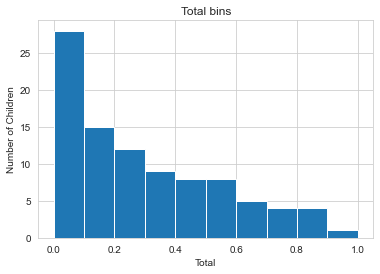

In [33]:
plt.hist(df_min_max_scaled['Total'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total bins').figure.savefig('Total_Histogram.png')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [34]:
bins = np.linspace(min(df_min_max_scaled['Total']), max(df_min_max_scaled['Total']), 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [35]:
group_names = ['Low', 'Medium', 'High']

In order to determine the value of ‘Total’ is belongs to which level: ‘Low’, ‘Medium’, or ‘High’, the pandas function `cut` is applied to the data. 

In [36]:
df_min_max_scaled['Total-binned'] = pd.cut(df_min_max_scaled['Total'], bins, labels=group_names, include_lowest=True )

In [37]:
df_min_max_scaled[['Total','Total-binned']].head(15)

,Total,Total-binned
0,0.594802,Medium
1,0.337464,Medium
2,0.297339,Low
3,0.149322,Low
4,0.052813,Low
5,0.013920,Low
6,0.016966,Low
7,0.000000,Low
8,0.049165,Low
9,0.079003,Low


In [38]:
df_min_max_scaled['Total-binned'].value_counts()

Low       59
Medium    25
High      10
Name: Total-binned, dtype: int64

Plotting the distribution of the bins:

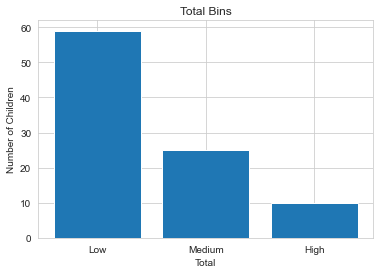

In [39]:
plt.bar(group_names, df_min_max_scaled['Total-binned'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total Bins').figure.savefig('Binned_Total_Histogram.png')

## Exploratory Data Analysis

In [40]:
df_cleaned = df_min_max_scaled.copy()

In [41]:
df_cleaned

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Total-binned
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019,Medium
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019,Medium
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019,Low
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019,Low
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019,High
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019,Medium
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019,Low
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019,Low


### Descriptive Question

**“What is the mean of the percentage of children who acquired foundational learning skills are from age 7 to 14?”**


In [42]:
df_cleaned['Total'].unique()

array([0.59480211, 0.33746447, 0.29733884, 0.14932174, 0.05281255,
       0.01392013, 0.01696592, 0.        , 0.04916508, 0.07900308,
       0.02628041, 0.0613843 , 0.10233371, 0.00127469, 0.095865  ,
       0.00414718, 0.14760852, 0.10122852, 0.0589104 , 0.04094385,
       0.25783733, 0.18791412, 0.06695199, 0.09070282, 0.14776384,
       0.08716702, 0.06627206, 0.05039741, 0.43038994, 0.26021728,
       0.35147016, 0.14232494, 0.70463373, 0.62586819, 0.4705136 ,
       0.36508159, 0.53291381, 0.15819981, 0.15269859, 0.00870904,
       0.2840384 , 0.08432335, 0.16061969, 0.0431432 , 0.77210111,
       0.56352979, 0.55051513, 0.35060715, 0.4763856 , 0.44780898,
       0.23900976, 0.23668374, 0.78502646, 0.49757613, 0.44341632,
       0.13839809, 0.30344008, 0.08392053, 0.46652061, 0.43484891,
       0.24157059, 0.21387929, 0.19074573, 0.14517942, 0.06825832,
       0.06441808, 0.64251426, 0.55776914, 0.31765184, 0.31463363,
       0.5702703 , 0.30206648, 0.27775963, 0.05051276, 0.88885

In [43]:
df_cleaned['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [44]:
df_cleaned['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

In [45]:
df_cleaned.loc[df['Age group'] == 'Age 7 to 14'].groupby(['Age group', 'Subject'])['Total'].mean().to_frame('Mean of percentage of children who acquired foundational learning skills')

Mean of percentage of children who acquired foundational learning skills
Age group   Subject                                                                           
Age 7 to 14 Numeracy                                           0.323884                       
            Reading                                            0.474519

### Exploratory Question

**“What is the relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills?”**


In [46]:
df_cleaned[['Total', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,0.594802,0.464655,0.488939,0.644270,0.682321,0.750140
1,0.337464,0.256991,0.280049,0.347804,0.388495,0.456616
2,0.297339,0.218173,0.202689,0.289658,0.358703,0.498521
3,0.149322,0.113977,0.116234,0.141038,0.157185,0.264095
4,0.052813,0.006390,0.033854,0.021514,0.050373,0.157210
...,...,...,...,...,...,...
93,0.855046,0.806833,0.757238,0.919847,0.891114,0.932783
96,0.540150,0.332770,0.381186,0.561429,0.708592,0.905390
97,0.297598,0.165873,0.237684,0.261230,0.393880,0.555034
98,0.235630,0.082500,0.115561,0.215509,0.346275,0.597658


**Data Visualization**

The correlation between two attributes, such as ‘Total’ and ‘Wealth quintile’ can be better visualized in a scatter plot of data points. 

(0.0, 1.0499999999999998)

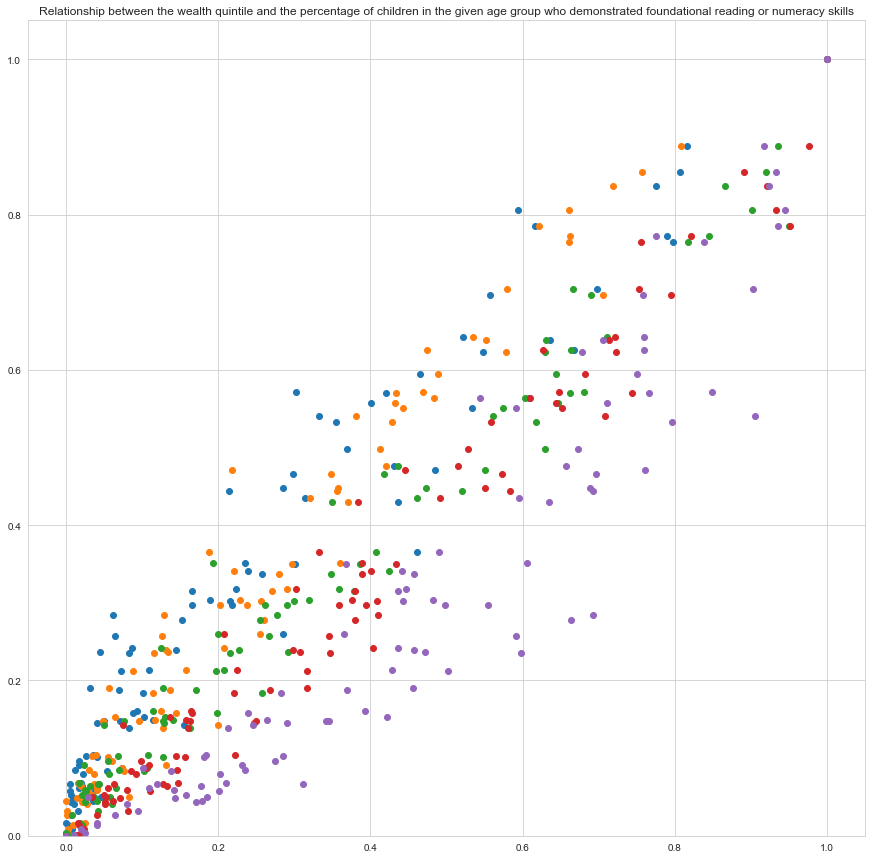

In [47]:
fig, axs = plt.subplots(figsize=(15,15), sharey=True)
plt.title('Relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills')
axs.scatter(df_cleaned['Wealth quintile-Poorest'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Second'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Middle'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Fourth'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Richest'],df_cleaned['Total']).figure.savefig('Wealth_Scatterplot.png')
plt.ylim(0,)

(0.0, 1.177162464904999)

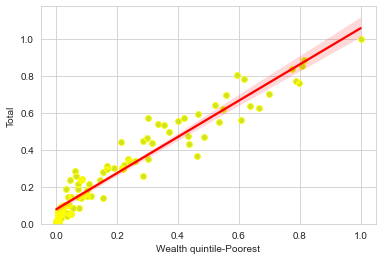

In [50]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "yellow"}, line_kws={"color": "red"}).figure.savefig('Poorest_Regplot.png')
plt.ylim(0,)

(0.0, 1.2350421653023258)

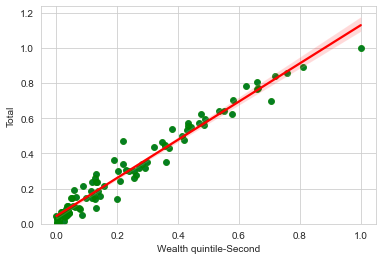

In [51]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "g"}, line_kws={"color": "red"}).figure.savefig('Second_Regplot.png')
plt.ylim(0,)

(0.0, 1.0499999999999998)

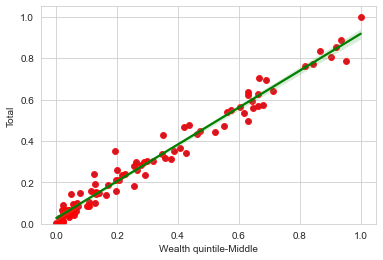

In [52]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "r"}, line_kws={"color": "green"}).figure.savefig('Middle_Regplot.png')
plt.ylim(0,)

(0.0, 1.0514575168757898)

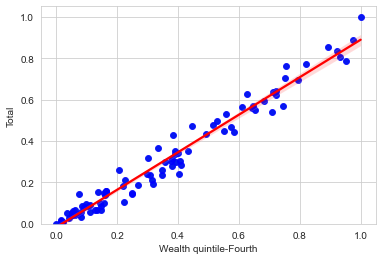

In [53]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "b"}, line_kws={"color": "red"}).figure.savefig('Fourth_Regplot.png')
plt.ylim(0,)

(0.0, 1.055351636952252)

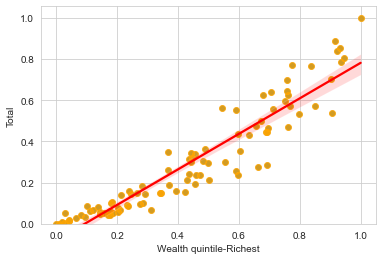

In [54]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "orange"}, line_kws={"color": "red"}).figure.savefig('Richest_Regplot.png')
plt.ylim(0,)

### Inferential Question

**“Based on the sample population of children who lived in Mongolia, the percentage of children who demonstrated foundational reading skills is higher than the percentage of children who demonstrated foundation numeracy skills. Will this hypothesis stand for the children who lived in Lesotho?”**

In [55]:
dfIQ = df_cleaned[['Countries and areas','Age group','Subject','Total']]
dfIQ

,Countries and areas,Age group,Subject,Total
0,Bangladesh,Age 7 to 14,Reading,0.594802
1,Bangladesh,Age 7 to 14,Numeracy,0.337464
2,Bangladesh,Grade 2/3,Reading,0.297339
3,Bangladesh,Grade 2/3,Numeracy,0.149322
4,Central African Republic,Age 7 to 14,Reading,0.052813
...,...,...,...,...
93,Turkmenistan,Age 7 to 14,Numeracy,0.855046
96,Zimbabwe,Age 7 to 14,Reading,0.540150
97,Zimbabwe,Age 7 to 14,Numeracy,0.297598
98,Zimbabwe,Grade 2/3,Reading,0.235630


**Data Visualization**

In [56]:
filter = dfIQ['Countries and areas'] == 'Mongolia'
dfMong = dfIQ[filter]
dfMong

,Countries and areas,Age group,Subject,Total
44,Mongolia,Age 7 to 14,Reading,0.772101
45,Mongolia,Age 7 to 14,Numeracy,0.563530
46,Mongolia,Grade 2/3,Reading,0.550515
47,Mongolia,Grade 2/3,Numeracy,0.350607


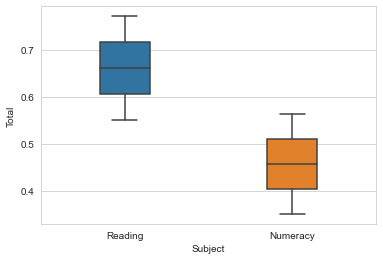

In [57]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfMong).figure.savefig('Mongolia_Subject_Boxplot.png')

In [58]:
filter = dfIQ['Countries and areas'] == 'Lesotho'
dfLeso = dfIQ[filter]
dfLeso

,Countries and areas,Age group,Subject,Total
36,Lesotho,Age 7 to 14,Reading,0.532914
37,Lesotho,Age 7 to 14,Numeracy,0.158200
38,Lesotho,Grade 2/3,Reading,0.152699
39,Lesotho,Grade 2/3,Numeracy,0.008709


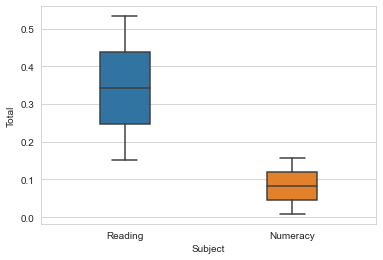

In [59]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfLeso).figure.savefig('Lesotho_Subject_Boxplot.png')

### Predictive Question

**“What is the predicted average percentage of children of Mongolia who acquired foundational learning skills in the year 2022?"**

**Build a Predictive Model**

In [60]:
df_pred = df.copy()

In [61]:
xl_file = pd.ExcelFile('Literacy-rate_2021-1.xlsx')

literacy = xl_file.parse('Youth literacy rate, aged 15-24', header=[0, 1])
    
col = []
for i in range(len(literacy.columns)):
    if i < 6:
        col.append(literacy.columns[i][0])
    else:
        col.append(literacy.columns[i][0] + '-' + literacy.columns[i][1])    
#literacy.drop(literacy.index[100:], inplace=True)
literacy.columns = col
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
214,NaN,South Asia,SA,NaN,89.95697,NaN,NaN,NaN,NaN,NaN
215,NaN,Sub-Saharan Africa,SSA,NaN,76.328102,NaN,NaN,NaN,NaN,NaN
216,NaN,Eastern & Southern Africa,NaN,ESA,79.924637,NaN,NaN,NaN,NaN,NaN
217,NaN,West & Central Africa,NaN,WCA,72.341187,NaN,NaN,NaN,NaN,NaN


In [62]:
literacy.dropna(subset=['Total'], inplace=True)
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
7,ARG,Argentina,LAC,LAC,Less Developed,99.505524,99.757652,99.241829,UIS,2018.0
13,BHR,Bahrain,MENA,MENA,Less Developed,99.687202,99.301338,99.976143,UIS,2018.0
...,...,...,...,...,...,...,...,...,...,...
194,URY,Uruguay,LAC,LAC,Less Developed,98.880272,99.165993,98.604752,UIS,2018.0
195,UZB,Uzbekistan,ECA,EECA,Less Developed,99.999939,99.999924,99.999931,UIS,2018.0
196,VUT,Vanuatu,EAP,EAP,Least Developed,96.282120,96.596611,95.976570,UIS,2018.0
198,VNM,Viet Nam,EAP,EAP,Less Developed,98.408096,98.353142,98.460121,UIS,2018.0


In [63]:
literacy.rename(columns={'Total':'Literacy_Total'}, inplace=True)
literacy = literacy[['Countries and areas', 'Literacy_Total']]
literacy

,Countries and areas,Literacy_Total
0,Afghanistan,65.420547
1,Albania,99.330002
2,Algeria,97.426521
7,Argentina,99.505524
13,Bahrain,99.687202
...,...,...
194,Uruguay,98.880272
195,Uzbekistan,99.999939
196,Vanuatu,96.282120
198,Viet Nam,98.408096


In [64]:
df_pred = df_pred.merge(literacy, how='left')
df_pred

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,NaN
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,NaN
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,NaN
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,NaN


In [65]:
df1 = df_pred.groupby(['Countries and areas']).mean()
df1

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total
Countries and areas,,,,,,,,,,,
Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427
Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650
Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,NaN
Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,NaN
Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,NaN
Ghana,12.674759,11.714040,13.613712,7.257946,20.007260,2.965855,9.244453,9.863954,15.696862,31.864600,92.490967
Guinea-Bissau,7.550170,6.811296,8.414608,5.329292,11.426943,3.616009,5.439116,5.593220,10.653504,12.506775,NaN
Kiribati,24.498808,28.008585,21.276123,25.201998,23.782427,21.125338,26.591137,15.562242,21.064391,39.231844,NaN
Kyrgyzstan,44.477615,47.493664,41.494103,40.868649,52.184168,43.984973,32.767901,44.911137,43.086610,61.754772,99.750000


In [66]:
df1.shape

(25, 11)

In [67]:
df1['Literacy_Total'].fillna(value=df1['Literacy_Total'].mean(), inplace=True)

In [68]:
df1

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total
Countries and areas,,,,,,,,,,,
Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427
Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650
Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,89.045035
Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,89.045035
Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,89.045035
Ghana,12.674759,11.714040,13.613712,7.257946,20.007260,2.965855,9.244453,9.863954,15.696862,31.864600,92.490967
Guinea-Bissau,7.550170,6.811296,8.414608,5.329292,11.426943,3.616009,5.439116,5.593220,10.653504,12.506775,89.045035
Kiribati,24.498808,28.008585,21.276123,25.201998,23.782427,21.125338,26.591137,15.562242,21.064391,39.231844,89.045035
Kyrgyzstan,44.477615,47.493664,41.494103,40.868649,52.184168,43.984973,32.767901,44.911137,43.086610,61.754772,99.750000


In [69]:
df1.shape

(25, 11)

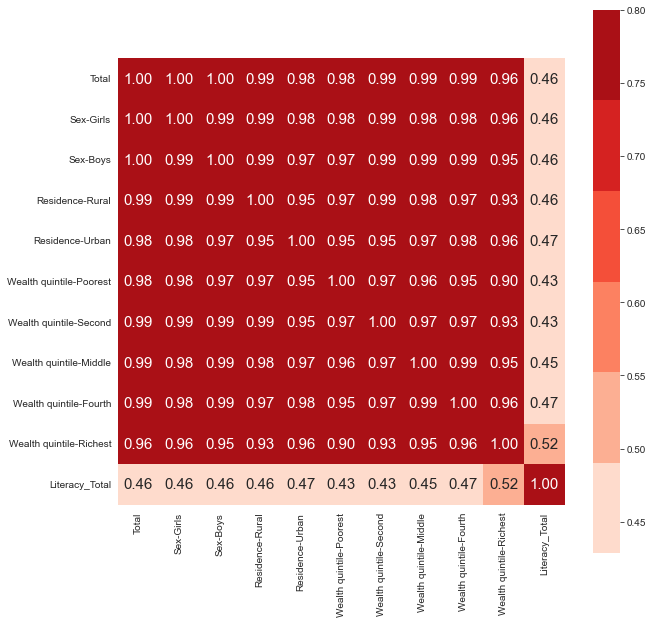

In [70]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap.png')

In [71]:
df1 = df1.reset_index()

In [72]:
X = df1[['Total']]
Y = df1[['Literacy_Total']]

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)
Y_test_pred = lm.predict(X_test)
Y_train_pred = lm.predict(X_train)

print('Train r2 score: ', r2_score(Y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, Y_test_pred)) 
print('Train MAE: ', mean_absolute_error(Y_train_pred, y_train))
print('Test MAE: ',mean_absolute_error(y_test, Y_test_pred))

Train r2 score:  -3.702339569933475
Test r2 score:  0.3839339073934972
Train MAE:  7.137259086927829
Test MAE:  7.286026909193393


In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
dtr1 = DecisionTreeRegressor(max_depth=3)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [78]:
y_pred2 = dtr1.predict(X_test)
dtr1_mae = mean_absolute_error(y_test, y_pred2)
dtr1_mae

6.600138965834913

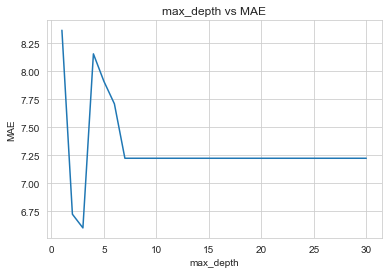

In [79]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('DTR.png')
plt.show()

In [80]:
dtr1.predict([[50]])

array([95.58908655])

In [81]:
lm.predict([[50]])

array([[95.40500772]])

### Causal Question

**“Will an increase in the age of children increase the percentage of children who demonstrated foundational reading or numeracy skills?”**

In [82]:
df2 = df.copy()

In [83]:
df2 = df2.groupby(['Age group']).mean().Total.to_frame().reset_index()
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508


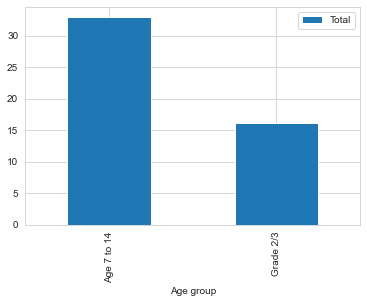

In [84]:
df2.plot.bar(x='Age group', y='Total').figure.savefig('Causal.png')

In [85]:
df2.iloc[0].Total

32.89177642941475

In [86]:
new_row = pd.DataFrame({'Age group':['Age 9 to 14'], 'Total': [df2.iloc[0].Total - df2.iloc[1].Total]})
df2 = pd.concat([df2, new_row], ignore_index = True, axis = 0)
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508
2,Age 9 to 14,16.808268


In [87]:
df2.drop(df2.loc[df2['Age group']=='Age 7 to 14'].index, inplace=True)

In [88]:
df2.loc[1,['Age group']] = 'Age 7 to 8'

In [89]:
df2

,Age group,Total
1,Age 7 to 8,16.083508
2,Age 9 to 14,16.808268


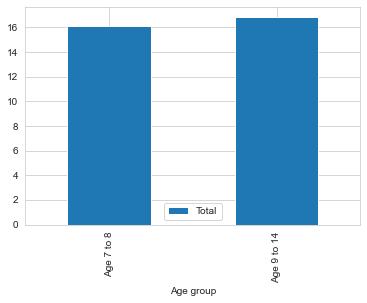

In [90]:
df2.plot.bar(x='Age group', y='Total').figure.savefig('Causal1.png')